# IAPR: PROJECT

**Group ID:** 45

**Author 1:** Romane Michèle Paula Vorwald (326675)  
**Author 2:** Thomas Van Spaendonk (344550)   
**Author 3:** Sina Philine Eutebach (404298) 

In [5]:
# import necessary libraries and files

import os
import matplotlib.pyplot as plt

from project_functions import *

In [2]:
# PATH DEF
path_to_ref = "./dataset/references"
path_to_train = "./dataset/train"
path_to_test = "./dataset/test"

path_to_labels = "./dataset/train.csv"
path_to_submission = "./dataset/sample_submission.csv"

assert os.path.exists(path_to_ref), "ERROR: references folder not found"
assert os.path.exists(path_to_train), "ERROR: train folder not found"
assert os.path.exists(path_to_test), "ERROR: test folder not found"
assert os.path.exists(path_to_labels), "ERROR: labels for training not found"
assert os.path.exists(path_to_submission), "ERROR: submission file not found"

# CHOCO TYPES
amandina = "1. Amandina"
arabia = "2. Arabia"
comtesse = "3. Comtesse"
creme_brulee = "4. Crème brûlée"
jelly_black = "5. Jelly black"
jelly_milk = "6. Jelly milk"
jelly_white = "7. Jelly white"
noblesse = "8. Noblesse"
noir_authentique = "9. Noir authentique"
passion_lait = "10. Passion au lait"
stracciatella = "11. Stracciatella"
tentation_noir = "12. Tentation noir"
triangolo = "13. Triangolo"

In [4]:
# !!!!!!!!! ONLY RUN THIS CELL THE FIRST TIME YOU OPEN THE NOTEBOOK, IN ORDER TO CREATE THE NPY FILES !!!!!!!!!
# LATER --> ONLY USE THE LOADING CELL

#ref_img = load_jpg_folder(path_to_ref)
#np.save("ref_images.npy", ref_img)

In [3]:
# !!!!!!!!! ONLY RUN THIS CELL THE FIRST TIME YOU OPEN THE NOTEBOOK, IN ORDER TO CREATE THE NPY FILES !!!!!!!!!
# LATER --> ONLY USE THE LOADING CELL

#train_img = load_jpg_folder(path_to_train)
#train_filenames, train_labels = load_labels_csv(path_to_labels)

#np.savez("train_data.npz", images=train_img, labels=train_labels)

In [3]:
# !!!!!!!!! ONLY RUN THIS CELL THE FIRST TIME YOU OPEN THE NOTEBOOK, IN ORDER TO CREATE THE NPY FILES !!!!!!!!!
# LATER --> ONLY USE THE LOADING CELL

test_img = load_jpg_folder(path_to_test)
np.save("test_images.npy", test_img)

OSError: 12960000000 requested and 7718043648 written

In [3]:
# LOADING DATA

ref_img = np.load("ref_images.npy")

train_data = np.load("train_data.npz")
train_img = train_data["images"]
train_labels = train_data["labels"]

# train_img = np.load("test_images.npy")

In [6]:
print(ref_img.shape)

(13, 4000, 6000, 3)


# 1) DESCRIPTORS FOR REFERENCE IMAGES -> CENTER OF EACH CLASS

## a) Segmentation

In [4]:
# Compute seeds --> 3 min to compute

all_seeds, all_masks = compute_seeds_tot(ref_img)

Number of regions found: 10
area: 158865.0
area: 29.0
area: 29.0
area: 387.0
area: 67.0
area: 29.0
area: 854.0
area: 918.0
area: 99.0
area: 41.0
Number of regions found: 1
area: 172977.0
Number of regions found: 718
area: 709364.0
area: 64.0
area: 474.0
area: 18.0
area: 4071818.0
area: 412.0
area: 52.0
area: 76.0
area: 47.0
area: 617.0
area: 29.0
area: 36.0
area: 88.0
area: 410.0
area: 103.0
area: 61.0
area: 44.0
area: 84.0
area: 47.0
area: 29.0
area: 116.0
area: 197.0
area: 49.0
area: 67.0
area: 128.0
area: 249.0
area: 256.0
area: 29.0
area: 1020.0
area: 310.0
area: 136.0
area: 36.0
area: 101.0
area: 29.0
area: 682.0
area: 108.0
area: 29.0
area: 157.0
area: 80.0
area: 120.0
area: 29.0
area: 74.0
area: 143.0
area: 379.0
area: 103.0
area: 78.0
area: 79.0
area: 109.0
area: 1488.0
area: 277.0
area: 719.0
area: 202.0
area: 29.0
area: 59.0
area: 41.0
area: 46.0
area: 111.0
area: 29.0
area: 96.0
area: 48.0
area: 38.0
area: 1507.0
area: 190.0
area: 36.0
area: 29.0
area: 182.0
area: 66.0
area:

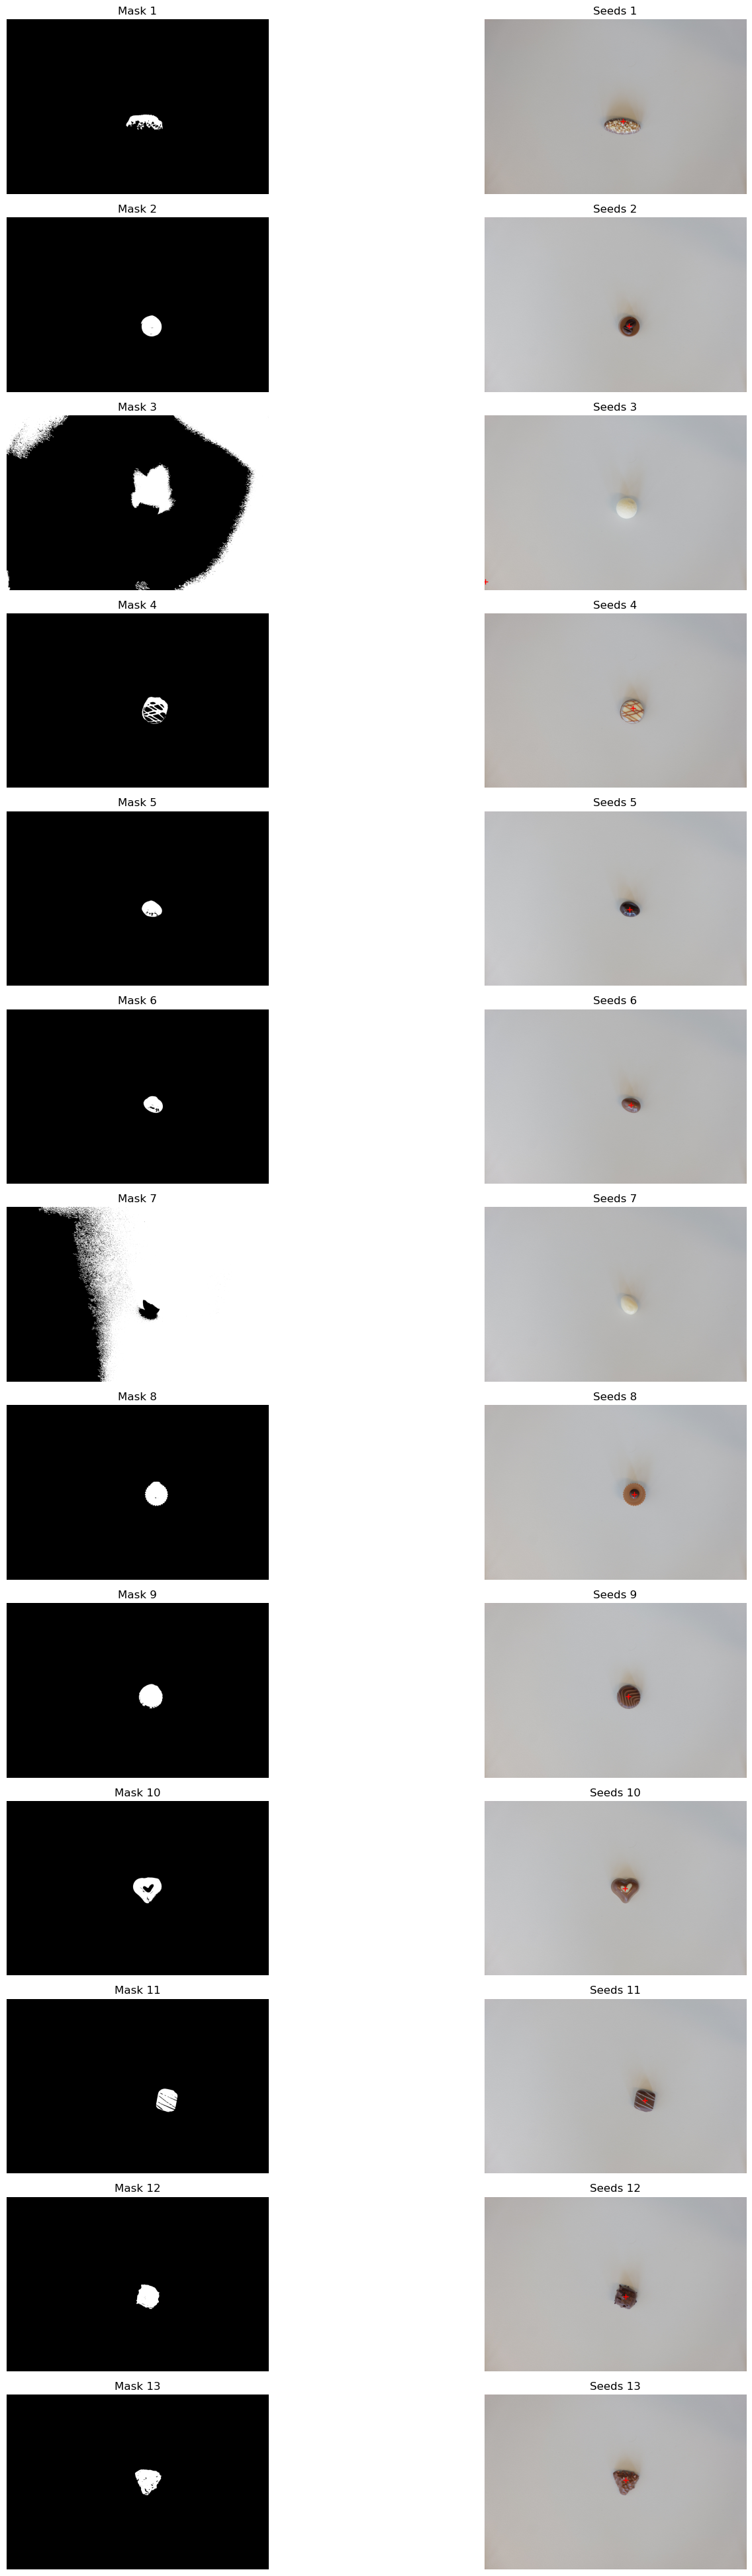

In [6]:
# Verify seeds

plt.figure(figsize=(18, 3 * len(ref_img)))

for i in range(len(ref_img)):
    img = ref_img[i]
    mask = all_masks[i]
    seeds = all_seeds[i]

    plt.subplot(len(ref_img), 2, 2*i + 1)
    plt.imshow(mask, cmap='gray')
    plt.title(f"Mask {i+1}")
    plt.axis('off')

    plt.subplot(len(ref_img), 2, 2*i + 2)
    plt.imshow(img)
    plt.title(f"Seeds {i+1}")
    for y, x in seeds:
        plt.plot(x, y, 'r+')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
# Region growing -> almost 10 min to run
# I REMOVED THE ONES WITH PB FOR DETECTING SEED

region_growing1 = region_growing(ref_img[0], all_seeds[0])
region_growing2 = region_growing(ref_img[1], all_seeds[1])
region_growing4 = region_growing(ref_img[3], all_seeds[3])
region_growing5 = region_growing(ref_img[4], all_seeds[4])
region_growing6 = region_growing(ref_img[5], all_seeds[5])
region_growing8 = region_growing(ref_img[7], all_seeds[7])
region_growing9 = region_growing(ref_img[8], all_seeds[8])
region_growing10 = region_growing(ref_img[9], all_seeds[9])
region_growing11 = region_growing(ref_img[10], all_seeds[10])
region_growing12 = region_growing(ref_img[11], all_seeds[11])
region_growing13 = region_growing(ref_img[12], all_seeds[12])

In [12]:
rg_masks: List[np.ndarray] = []
rg_masks.append(region_growing1)
rg_masks.append(region_growing2)
rg_masks.append(region_growing4)
rg_masks.append(region_growing5)
rg_masks.append(region_growing6)
rg_masks.append(region_growing8)
rg_masks.append(region_growing9)
rg_masks.append(region_growing10)
rg_masks.append(region_growing11)
rg_masks.append(region_growing12)
rg_masks.append(region_growing13)

region_growing_masks = np.stack(rg_masks, axis=0)

img: List[np.ndarray] = []
img.append(ref_img[0])
img.append(ref_img[1])
img.append(ref_img[3])
img.append(ref_img[4])
img.append(ref_img[5])
img.append(ref_img[7])
img.append(ref_img[8])
img.append(ref_img[9])
img.append(ref_img[10])
img.append(ref_img[11])
img.append(ref_img[12])

kept_img = np.stack(img, axis=0)

In [13]:
print(region_growing_masks.shape)
print(kept_img.shape)

(11, 4000, 6000)
(11, 4000, 6000, 3)


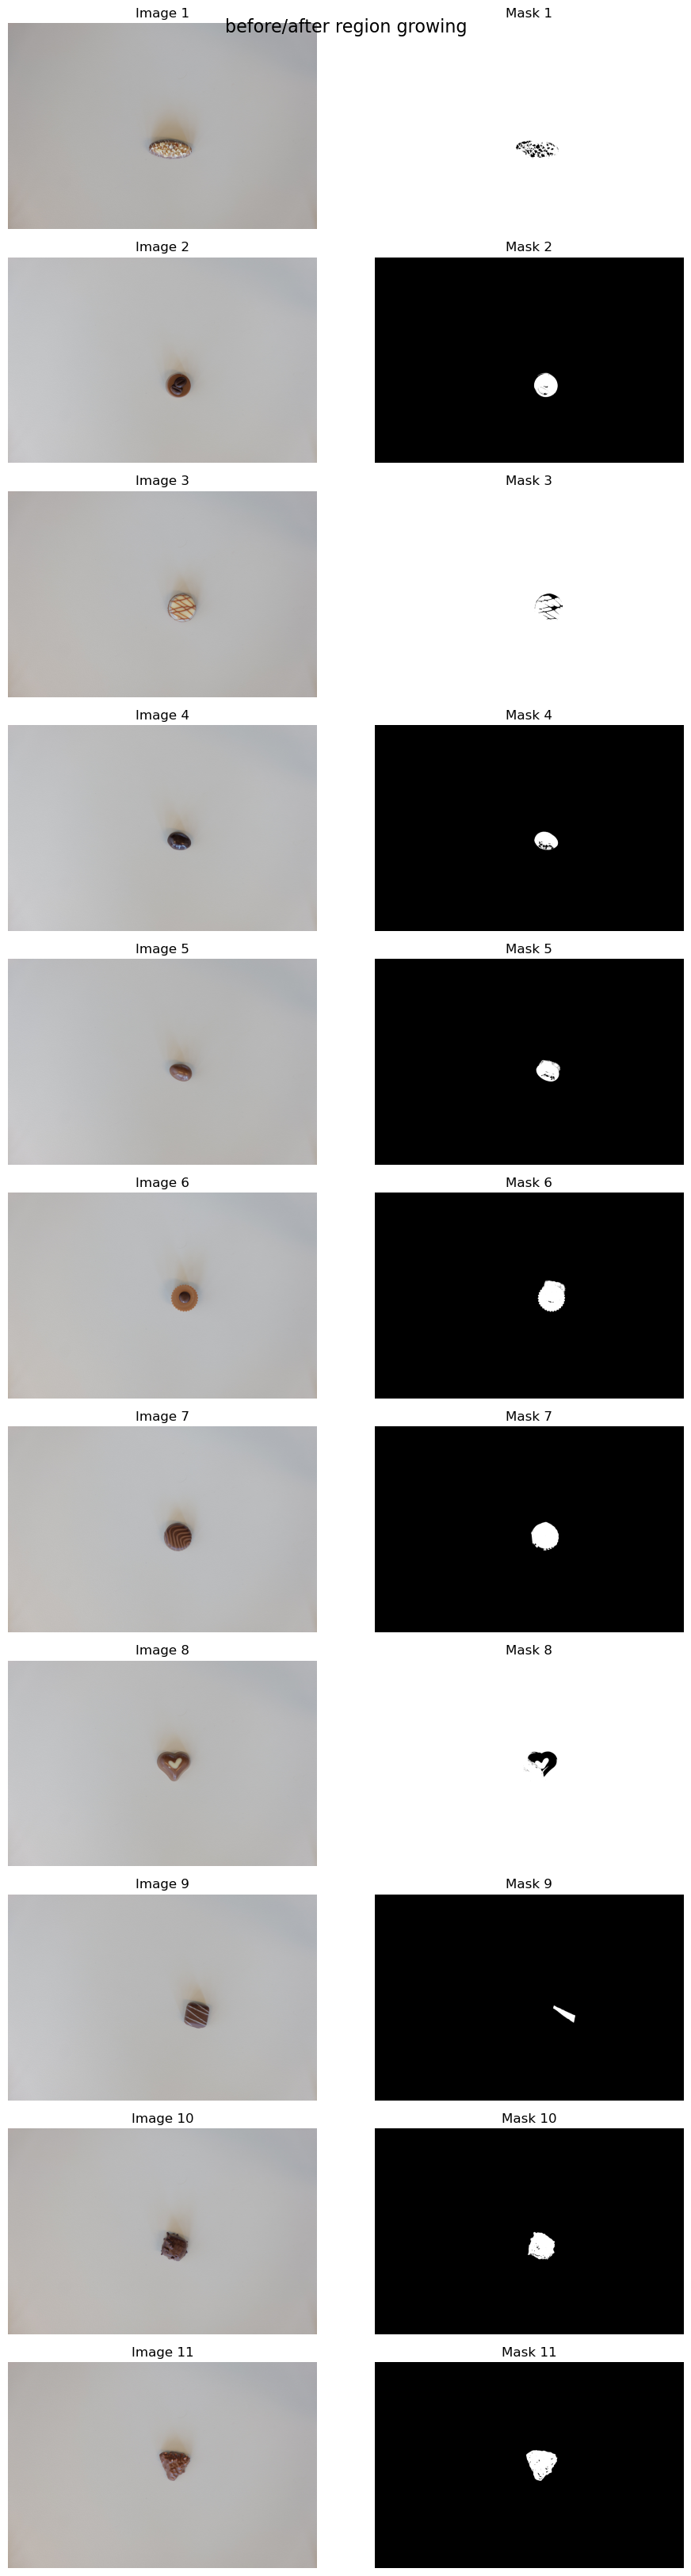

In [14]:
# Verify region growing mask

plot_batch_comparison(kept_img, region_growing_masks, "before/after region growing")

In [15]:
# Postprocess
# I REMOVED THE ONES WITH PB WITH REGION GROWING

postproc_mask2 = postprocess_region_growing(region_growing2)
postproc_mask5 = postprocess_region_growing(region_growing5)
postproc_mask6 = postprocess_region_growing(region_growing6)
postproc_mask8 = postprocess_region_growing(region_growing8)
postproc_mask9 = postprocess_region_growing(region_growing9)
postproc_mask12 = postprocess_region_growing(region_growing12)
postproc_mask13 = postprocess_region_growing(region_growing13)

In [29]:
postproc_masks: List[np.ndarray] = []
postproc_masks.append(postproc_mask2)
postproc_masks.append(postproc_mask5)
postproc_masks.append(postproc_mask6)
postproc_masks.append(postproc_mask8)
postproc_masks.append(postproc_mask9)
postproc_masks.append(postproc_mask12)
postproc_masks.append(postproc_mask13)

clean_masks = np.stack(postproc_masks, axis=0)

masks: List[np.ndarray] = []
masks.append(region_growing2)
masks.append(region_growing5)
masks.append(region_growing6)
masks.append(region_growing8)
masks.append(region_growing9)
masks.append(region_growing12)
masks.append(region_growing13)

kept_masks = np.stack(masks, axis=0)

img = []
img.append(ref_img[1])
img.append(ref_img[4])
img.append(ref_img[5])
img.append(ref_img[7])
img.append(ref_img[8])
img.append(ref_img[11])
img.append(ref_img[12])

kept_img = np.stack(img, axis=0)

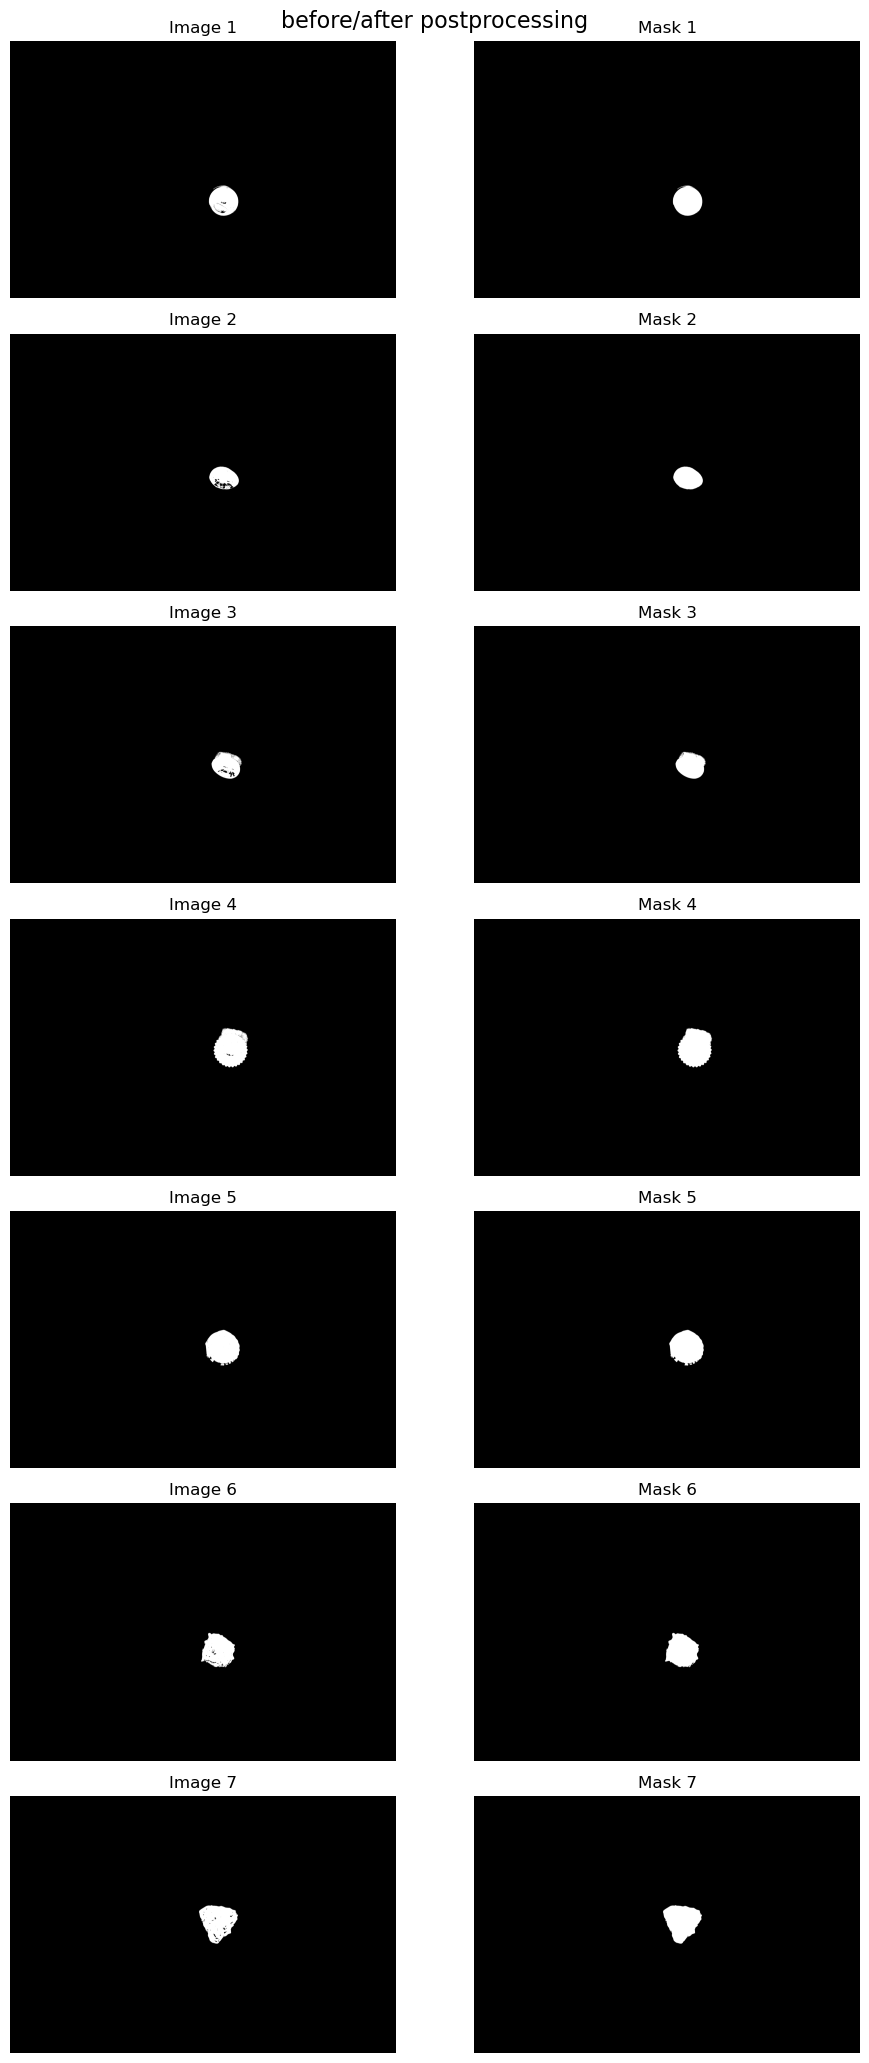

In [19]:
# Verify final masks

plot_batch_comparison(kept_masks, clean_masks, "before/after postprocessing")

## b) Object description

In [21]:
# Find contour

contours = find_all_contours(clean_masks)

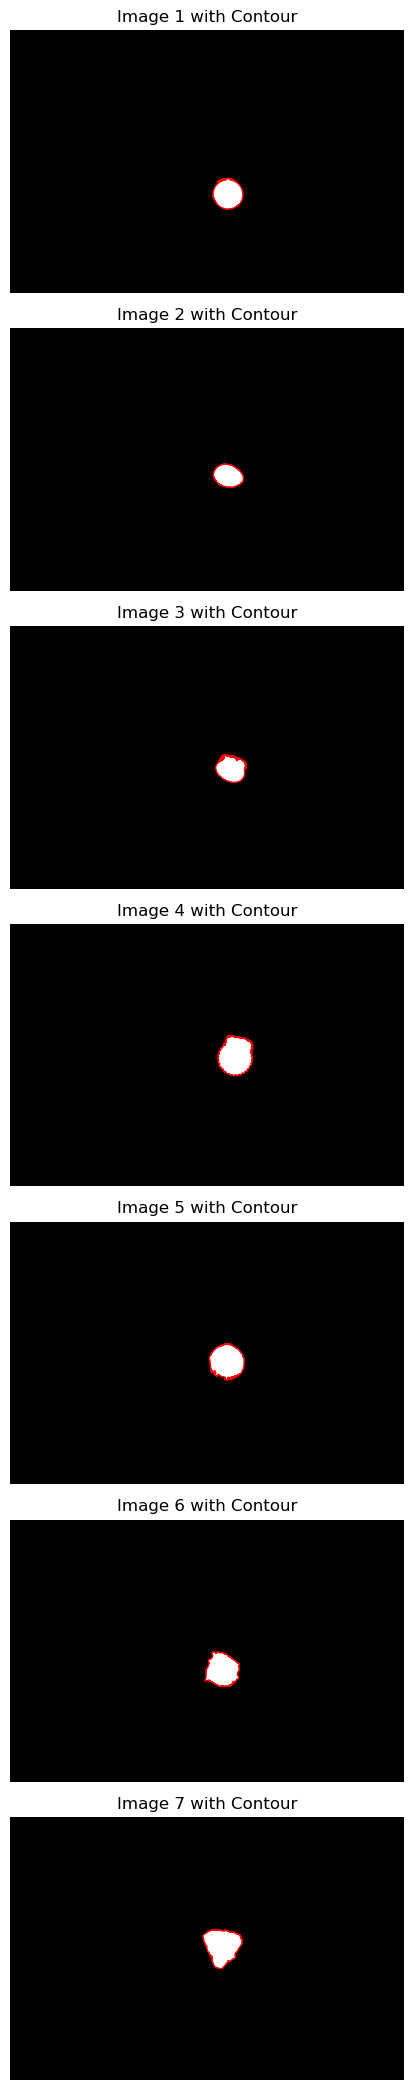

In [23]:
# Check contours

plot_contour_batch(clean_masks, contours)

In [25]:
# Region-based descriptors

all_region_descriptors = compute_all_region_descriptors(clean_masks)

In [26]:
# Check region-based descriptors

for i in range(len(all_region_descriptors)):
    print("DESCRIPTORS FOR IMAGE ", i)
    for k, v in all_region_descriptors[i].items():
        print(f"{k:15s} : {v}")

DESCRIPTORS FOR IMAGE  0
area            : 162429.5
rectangularity  : 0.7545735389761219
compacity       : 0.3629540490408205
elongation      : 1.0262787149390886
hu_moments      : [0.1595406506271002, 1.711853176235469e-05, 4.3283405117969596e-06, 2.860196987699501e-08, 9.114173825777462e-15, 1.0415341445641072e-10, 4.2671381992600024e-15]
DESCRIPTORS FOR IMAGE  1
area            : 121720.5
rectangularity  : 0.7437627936818306
compacity       : 0.6122290122928518
elongation      : 1.359362843635221
hu_moments      : [0.1670274271223982, 0.002472816477884725, 2.3523555132661334e-05, 7.963784342693165e-07, 3.4440996716193815e-12, 3.960147770265976e-08, 1.3931330678771287e-13]
DESCRIPTORS FOR IMAGE  2
area            : 142083.0
rectangularity  : 0.7169138238128636
compacity       : 0.10448748061614234
elongation      : 1.1608935952744852
hu_moments      : [0.16258608121832052, 0.0005797429100090838, 2.0894983291964663e-05, 1.0971288386427897e-07, -1.4574986929879572e-13, -7.8698591511071

In [27]:
# Fourier descriptors

all_fourier_desc = compute_descriptor_interpolated(contours, 13)

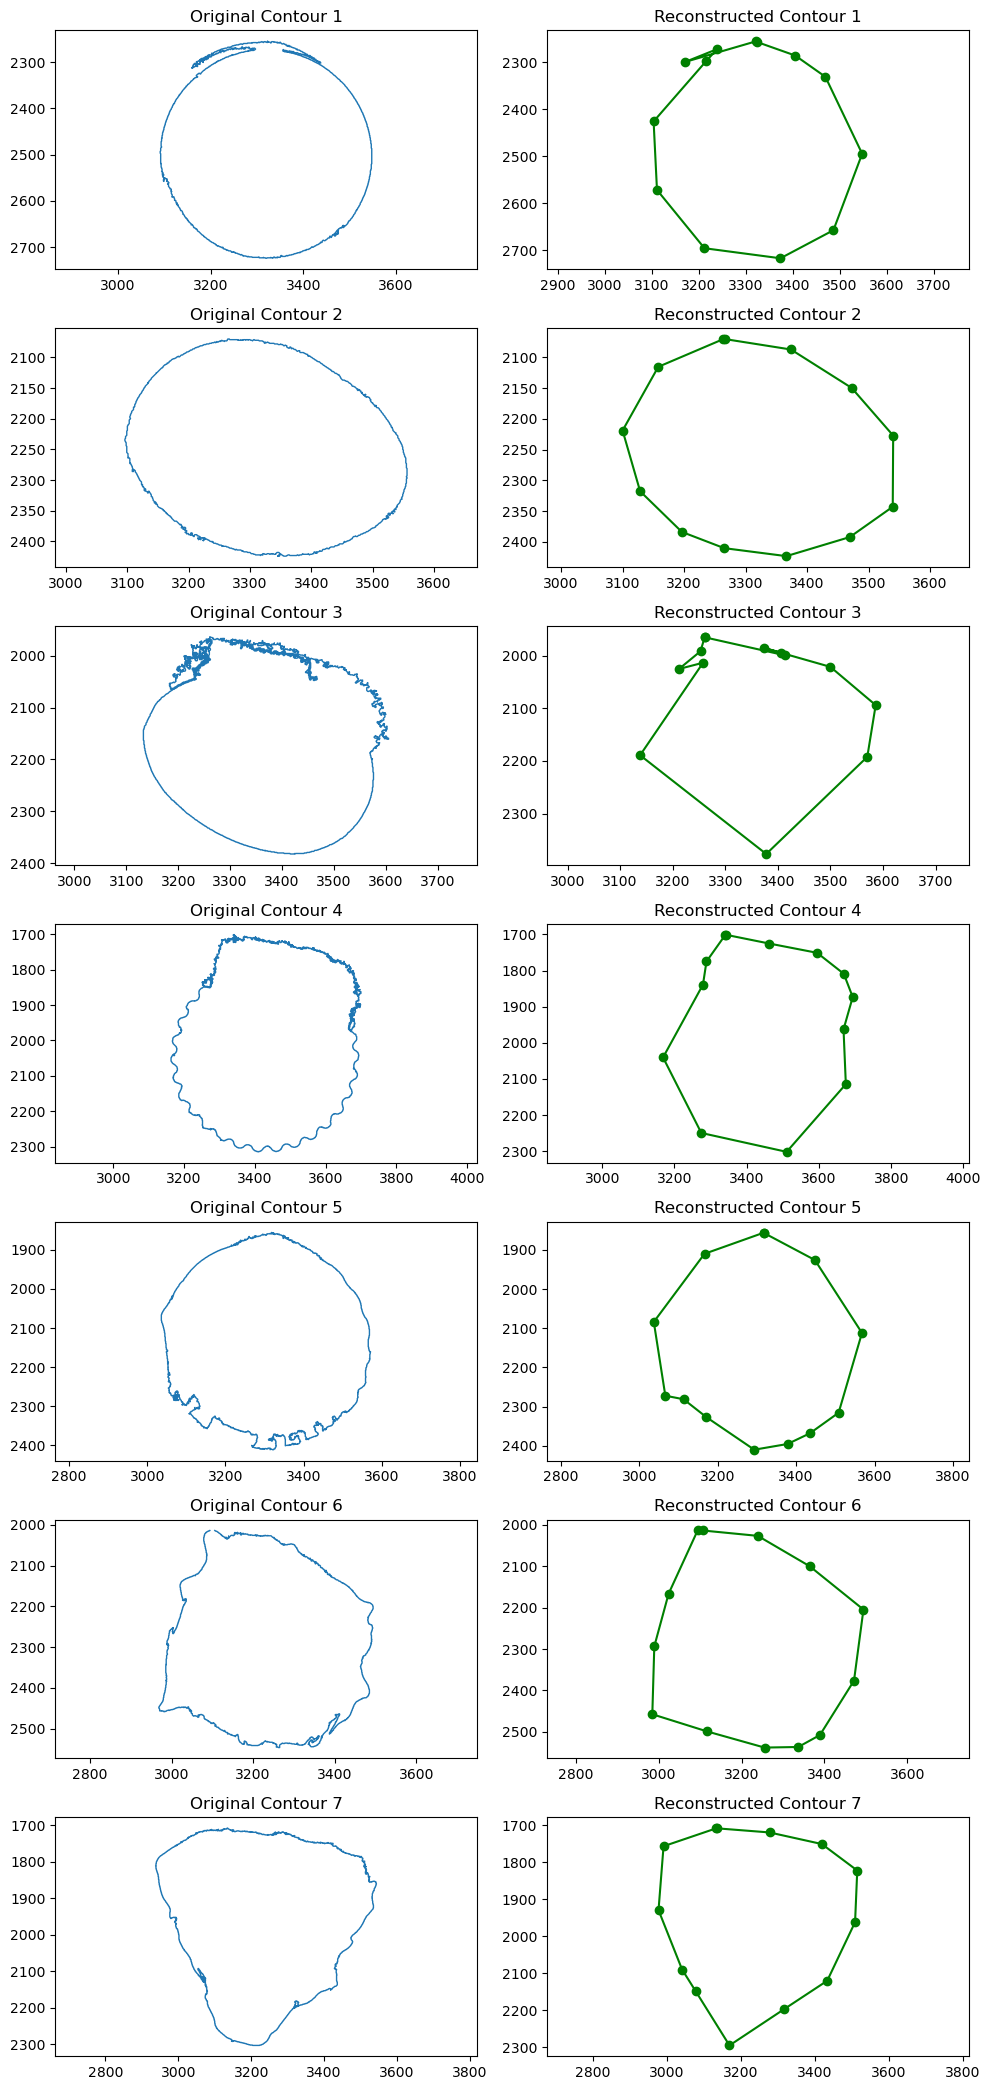

In [28]:
# Check Fourier descriptors

xs, ys = compute_reverse_descriptors(all_fourier_desc, n_samples=13)

plot_fourier_reconstructions(contours, xs, ys)

In [34]:
# Color-based descriptors

color_means_and_stds, color_hists = color_descriptors(kept_img, clean_masks)

In [32]:
# LBP histogram as descriptor

lbp_hists = lbp_histograms(kept_img, clean_masks)

/Users/romy/opt/anaconda3/envs/iapr/lib/python3.9/site-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


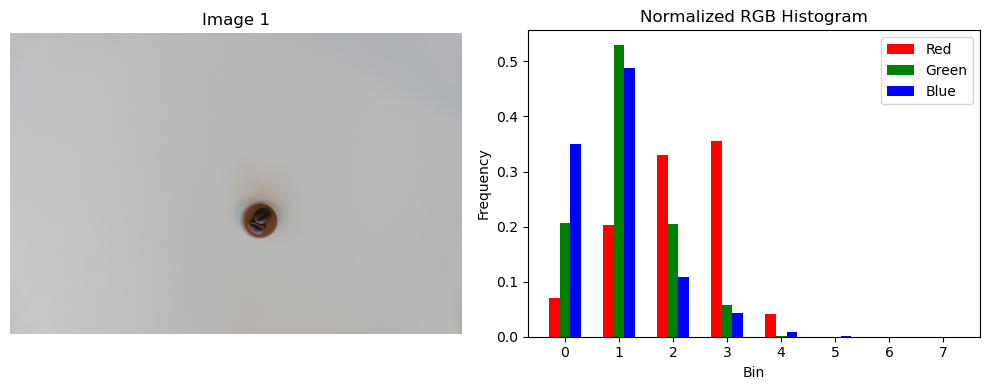

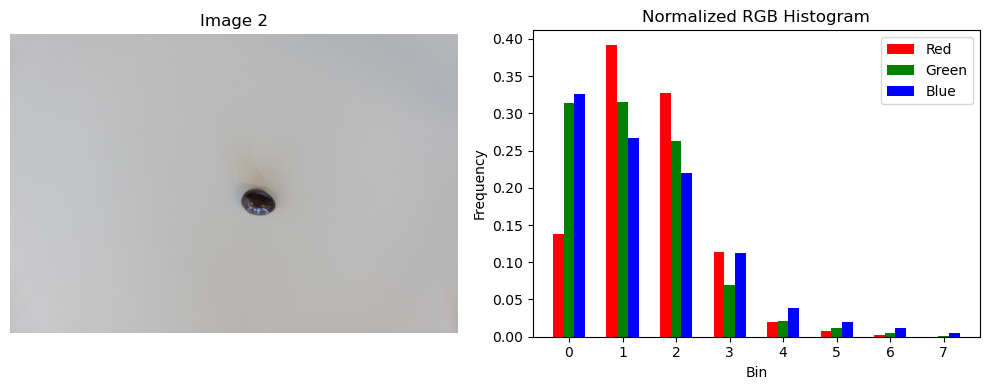

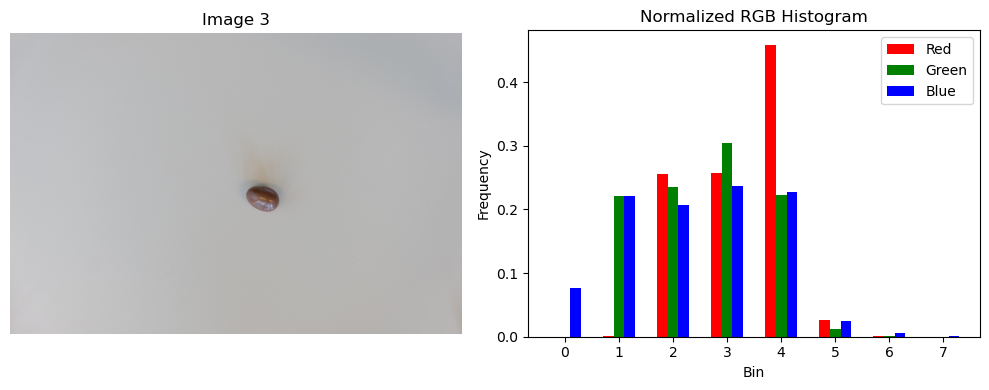

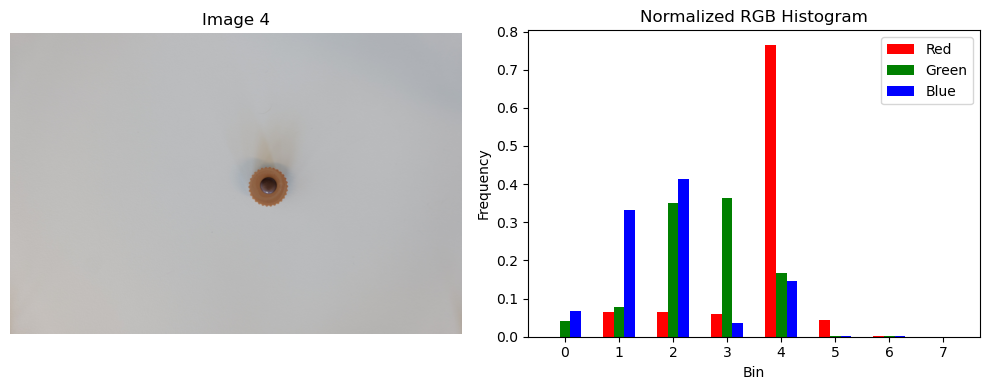

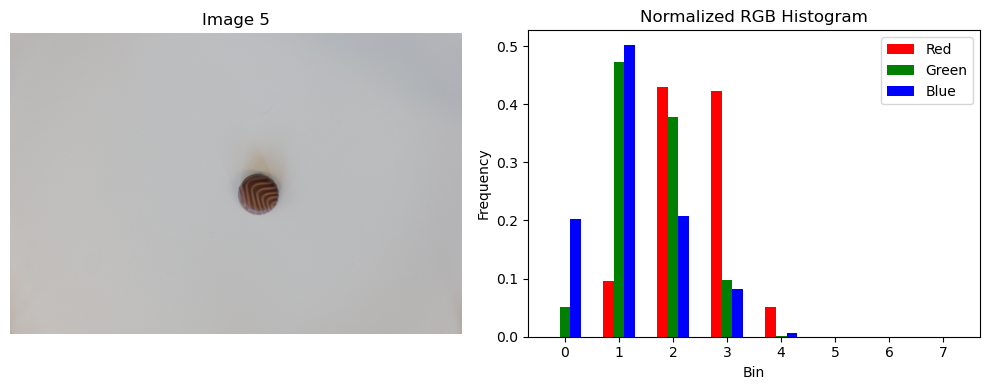

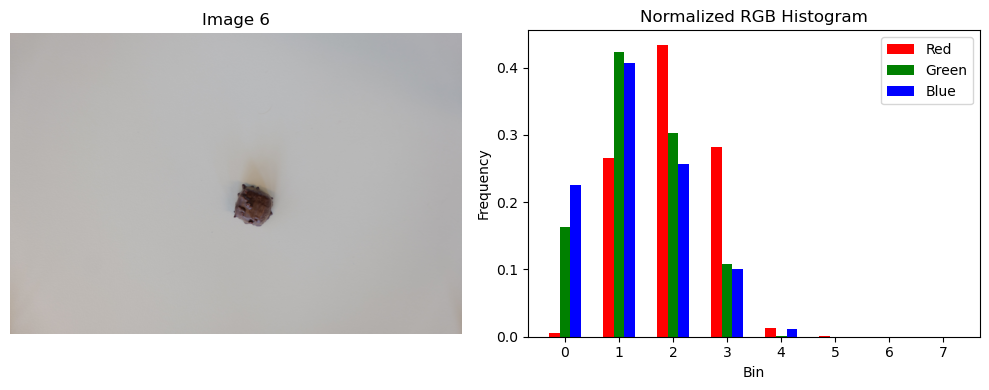

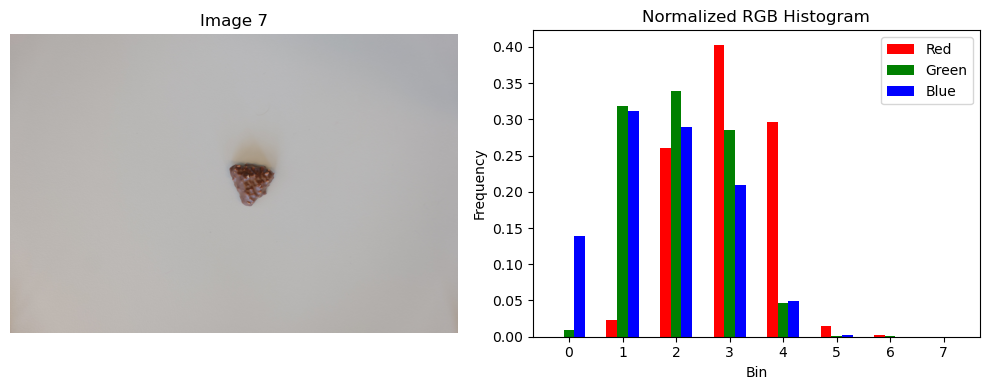

In [35]:
# Check color-based descriptors

show_rgb_histograms(kept_img, color_hists)

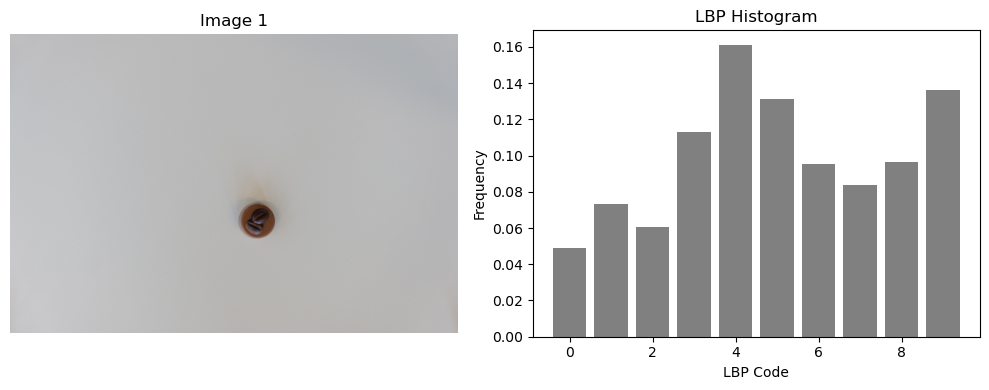

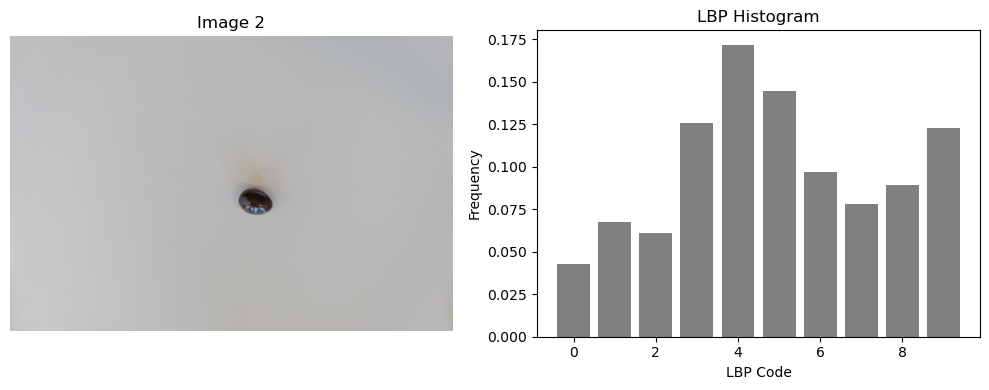

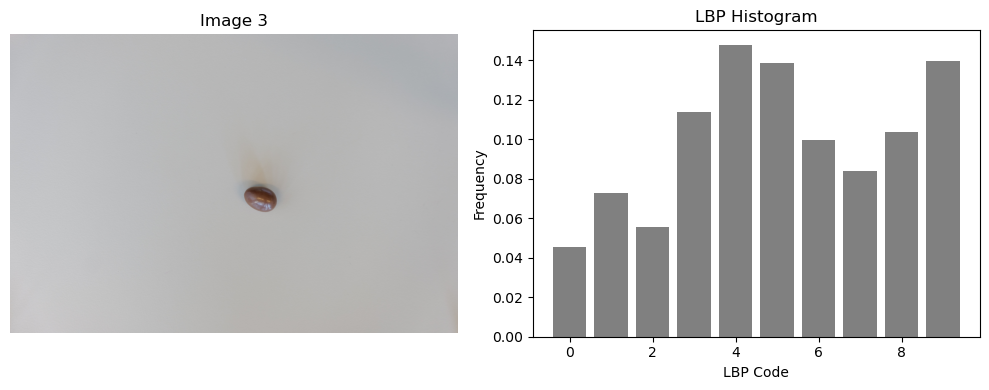

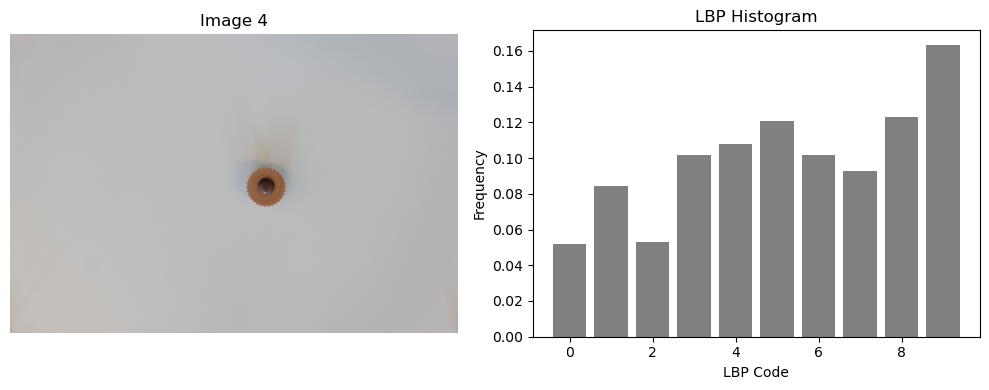

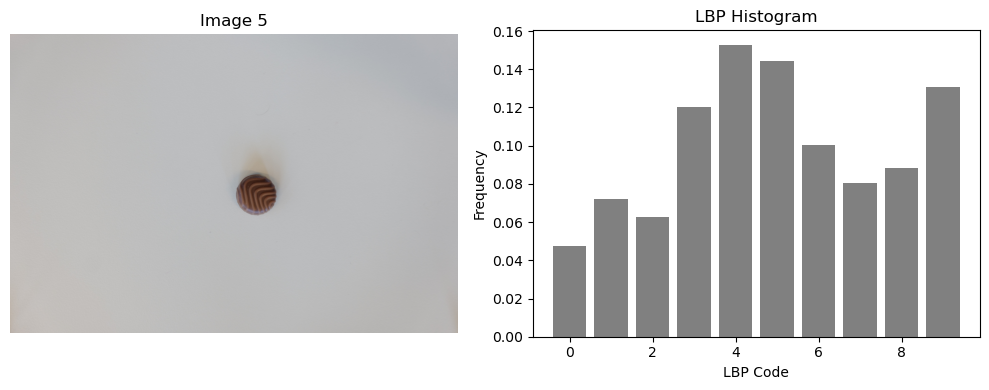

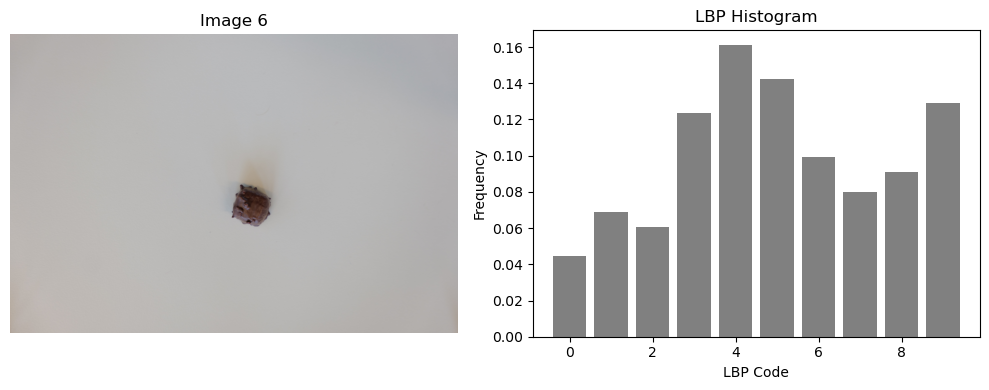

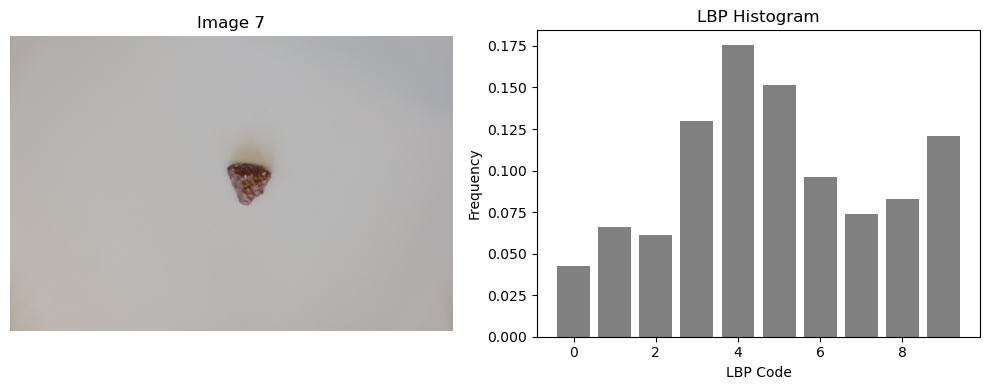

In [36]:
# Check LBP histograms

show_lbp_histograms(kept_img, lbp_hists)

In [41]:
# Concatenate all features

features_ref = concatenate_descriptors_batch(all_region_descriptors, all_fourier_desc, color_means_and_stds, color_hists, lbp_hists)

print(features_ref.shape)

(7, 77)


# 2) SEGMENTATION & OBJECT DESCRIPTION FOR ALL TRAINING IMAGES

## a) Segmentation

## b) Object description

# 3) CLASSIFICATION

# 4) CROSS-VALIDATION

# 5) FINAL TESTING & SUBMISSION FILE CREATION

In [ ]:
# PAS SÛR QUE ÇA MARCHE J'AI JUSTE COPIÉ / COLLÉ DE MON PROJET DE ML DU SEMESTRE PASSÉ!!!!!!! --> ADAPTER LES NOMS DES VARIABLES

# Format predictions for output
formatted_predictions = pd.DataFrame({
        "Id": range(1, len(predicted_labels) + 1),
        "Prediction": [1 if x == 1 else -1 for x in predicted_labels]
    })

    # Save predictions
formatted_predictions.to_csv("submission1.csv", index=False)